изначальная карта в матричном виде: 
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -8.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  0.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.]
 [ 0. -2.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.]
 [ 0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.]
 [ 0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Координаты входа:  [[9, 1]]
Координаты выхода:  [3, 9]
 
Координаты каждого шага: 
[4, 9] 1
[5, 9] 2
[6, 9] 3
[7, 9] 4
[8, 9] 5
[9, 9] 6
[9, 8] 7
[9, 7] 8
[9, 6] 9
[9, 5] 10
[9, 4] 11
[9, 3] 12
[9, 2] 13
[9, 1] 14
Матрица после обхода в ширину: 
[

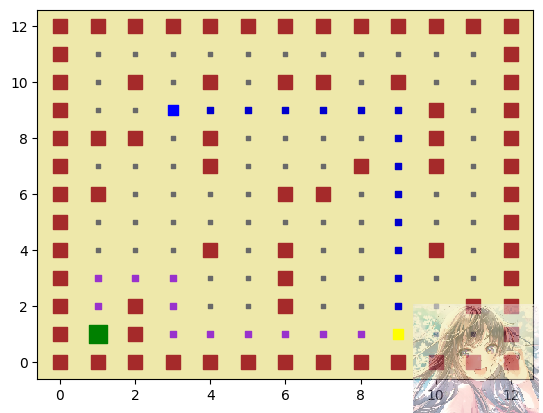

In [35]:
import matplotlib.pylab as pl
import numpy as np
import math
import random as rn
import matplotlib.image as img
  

#создаем матрицу карты 

n = 10
p = 1
xend = 1;
yend = 1;
map = np.zeros((n+3, n+3))
map[1][1] = 1
pos = [1, 1]
pas = []
taxi = []
pasc = []
full = []
pirs = [8, 7]
xx = 0
yy = 0
count1 = 0

# reading the image

#строим рандомный лабиринт с выходом - голубой и входом - красный 
for i in range(1, 1000):
    k = rn.randint(1,4)
    if k == 1:
            if pos[0]-2 >= 0 and pos[0] -2 <n+3:
                if map[pos[0]-2][pos[1]] == 0:
                    map[pos[0]-2][pos[1]] = 1
                    map[pos[0]-1][pos[1]] = 1
                pos[0] = pos[0] - 2
 
    if k == 2:
            if pos[0] + 2 < n+3 and pos[0] + 2 >= 0:
                if map[pos[0]+2][pos[1]] == 0:
                    map[pos[0]+2][pos[1]] = 1
                    map[pos[0]+1][pos[1]] = 1
                pos[0] = pos[0] + 2
          
    if k == 3:
            if pos[1] - 2 >= 0 and pos[1] - 2 < n+3:
                if map[pos[0]][pos[1]-2] == 0:
                    map[pos[0]][pos[1]-2] = 1
                    map[pos[0]][pos[1]-1] = 1
                pos[1] -= 2
           
    if k == 4:
            if pos[1] + 2 <n+3 and pos[1] + 2 >=0:
                if map[pos[0]][pos[1]+2] == 0:
                    map[pos[0]][pos[1]+2] = 1
                    map[pos[0]][pos[1]+1] = 1
                pos[1] += 2
for i in range(0, n**2 - n*2):
    xi = rn.randint(1, n+1)
    yi = rn.randint(1, n+1)
    if map[xi][yi] == 0:
        map[xi][yi] = 1
    if i == n**2-n*2 - 4:
        map[xi][yi] =-1
        xx = xi
        yy = yi


        
op = 0;
while op < p:
    x = rn.randint(1,n+2)
    y = rn.randint(1,n+2)
    if map[x][y] == 1:
        if map[x+1][y] != -2 and map[x-1][y] != -2 and map[x][y+1] != -2 and map[x][y-1] != -2:
            map[x][y] = -2;
            op+=1;
            pas.append([x,y])
            full.append([x,y])
map[xend][yend] = -8;
#===============================================================================================================
#рисуем сам лабиринт
glav = []     
fig = pl.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('PaleGoldenrod')
ax.patch.set_alpha(1.0)
for i in range(0, n+3):
    for j in range(0,n+3):
        if map[i][j] == 1:
            pl.scatter(i,j, s = 5, c = 'DimGray', marker='s')
        if map[i][j] == 0:
            pl.scatter(i,j, s = 900/n, c = 'brown', marker='s')
        if map[i][j] == -1:
            pl.scatter(i,j, s = 50, c = 'blue', marker='s')
        if map[i][j] == -2:
            pl.scatter(i,j, s = 50, c = 'yellow', marker='s')
        if map[i][j] == -3:
            pl.scatter(i,j, s = 15, c = 'yellow', marker='s')
        if map[i][j] == -8:
            pl.scatter(i,j, s = 150, c = 'green', marker='s')
print("изначальная карта в матричном виде: ")
print(map)
print("Координаты входа: ",pas)
print("Координаты выхода: ",[xx, yy])
print(" ")

#========== Ходим по всему лабиринту с шагам +1 ======================================================
for z in range(len(pas)):
        up = pas[z][0]
        vp = pas[z][1]
        ut = xx
        vt = yy
        posp = [up,vp]
        pcop = posp.copy()
        post = [ut,vt]
        mapi = map.copy()
        posp = [up+1, vp]
        if mapi[up+1][vp] != 0 and posp != post:
            mapi[up+1][vp] = 2;
        posp = [up-1, vp]
        if mapi[up-1][vp] != 0 and posp != post:
            mapi[up-1][vp] = 2;
        posp = [up, vp+1]
        if mapi[up][vp+1] != 0 and posp != post:
            mapi[up][vp+1] = 2;
        posp = [up, vp-1]
        if mapi[up][vp-1] != 0 and posp != post:
            mapi[up][vp-1] = 2;
        mapi[up][vp] = -21
        for k in range(2, 400):
            for i in range(0,n+3):
                for j in range(0,n+3):
                    if mapi[i][j] == k:
                        posp = [i+1, j]
                        if (mapi[i+1][j] == 1 or mapi[i+1][j] == -2  or mapi[i+1][j] == -1 or mapi[i+1][j] == -3) and  i+1 <=n+2 and posp != post :
                            mapi[i+1][j] = k+1;
                        posp = [i-1, j]
                        if (mapi[i-1][j] == 1  or mapi[i-1][j] == -2  or mapi[i-1][j] == -1 or mapi[i-1][j] == -3) and i-1>=0 and posp != post:
                            mapi[i-1][j] = k+1;
                        posp = [i,j+1]
                        if (mapi[i][j+1] == 1 or mapi[i][j+1] == -2 or mapi[i][j+1] == -1 or mapi[i][j+1] == -3)  and  j+1 <= n+2 and posp != post:
                            mapi[i][j+1] = k+1;
                        posp = [i, j-1]
                        if (mapi[i][j-1] == 1 or mapi[i][j-1] == -2 or mapi[i+1][j] == -1 or mapi[i+1][j] == -3)   and  j-1 >=0 and posp != post:
                            mapi[i][j-1] = k+1;
     
   
        l = 400
        viz = []
        viz.append(l)
        print("Координаты каждого шага: ")
        while l > 2:
            

            lim = 0;
            if mapi[ut+1][vt] == -21:
                viz[0] = 1
                l = 1
            if mapi[ut-1][vt] == -21:
                viz[0] = 1
                l = 1
            if mapi[ut][vt-1] == -21:
                viz[0] = 1
                l = 1
            if mapi[ut][vt+1] == -21:
                viz[0] = 1
                l= 1
            
            if mapi[ut+1][vt] < l and mapi[ut+1][vt] !=0 and mapi[ut+1][vt] != -3  and mapi[ut+1][vt] !=-2 and mapi[ut+1][vt] !=-1  and mapi[ut+1][vt] !=-21 and mapi[ut+1][vt] !=1:
                    l = mapi[ut+1][vt]
                    viz[0] = l                                 
                    lim = 0
                    
            if mapi[ut-1][vt] < l and mapi[ut-1][vt] !=0 and mapi[ut-1][vt] != -3  and mapi[ut-1][vt] !=-2   and mapi[ut-1][vt] !=-1 and mapi[ut-1][vt] !=-21 and mapi[ut-1][vt] !=1:
                    l = mapi[ut-1][vt] 
                    viz[0] = l    
                    lim = 1
                    
            if mapi[ut][vt+1] < l and mapi[ut][vt+1] !=0 and mapi[ut][vt+1] != -3 and mapi[ut][vt+1] != -1  and mapi[ut][vt+1] !=-2 and mapi[ut][vt+1] !=-21 and mapi[ut][vt+1] !=1:
                    l = mapi[ut][vt+1]
                    viz[0] = l
                    lim = 2
                    
            if mapi[ut][vt-1] < l and mapi[ut][vt-1] !=0 and mapi[ut][vt-1] != -3 and mapi[ut][vt-1] !=-1  and mapi[ut][vt-1] !=-2  and mapi[ut][vt-1] !=-21 and mapi[ut][vt-1] !=1:
                    l = mapi[ut][vt-1] 
                    viz[0] = l
                    lim = 3
            if lim == 0:
                ut = ut + 1
                vt = vt
                pl.scatter(ut,vt, s = 25, c = 'MediumBlue', marker='s')
            
            if lim == 1:
                vt = vt
                ut= ut - 1    
                pl.scatter(ut,vt, s = 25, c = 'MediumBlue', marker='s')
           
            if lim == 2:
                vt = vt+ 1
                ut = ut
                pl.scatter(ut,vt, s = 25, c = 'MediumBlue', marker='s')
                
            if lim == 3:
                vt = vt - 1
                ut = ut
                pl.scatter(ut,vt, s = 25, c = 'MediumBlue', marker='s')

            count1 += 1
            print([ut, vt], count1)
        
        
            
         
                
    
  
    
        print([up, vp], count1+1)              
                           
        #viz.append(post)
        #viz.append(pcop)
        #glav.append(viz)
        #print(viz)
        print("Матрица после обхода в ширину: ")
        print(mapi)
print(" ")
#======================== Перейдем к методу A* ===============================================================
def astar(xx, yy, cor, col):
    #массивы вершин будущих
    count2 = 0
    open1 = []
    open2 = []
    om = []
    mini = []
    close = []
    path = []
    Path = []
    #веса только по кресту
    g = 5
    g1 = 0
    h = 100
    # координаты выхода - синенький
    t11 = [xx, yy]
    # координаты входа - красненький
    p11 = [x, y]

    # функция определения расстояние
    def oprh(x1, y1, x2, y2):
        dx = abs(x1-x2)
        dy = abs(y1-y2)
        if dx > dy:
            return dy + (dx - dy)
        else:
            return dx + (dy - dx)
    #================== Заготовки и само описание алгоритма =======================================================
    map2 = map.copy()
    om = []
    h = oprh(p11[0],p11[1], xx, yy)
    om.append(g1 + h)
    om.append(p11)
    om.append(0)
    open2.append(om)
    while map2[p11[0]+ 1][p11[1]] != cor and map2[p11[0]- 1][p11[1]] != cor and map2[p11[0]][p11[1]+1] != cor and map2[p11[0]][p11[1]-1] != cor:
        close.append(p11)
        if map2[p11[0]+ 1][p11[1]] == 1 and [p11[0]+1,p11[1]] not in open1 and [p11[0]+1,p11[1]] not in close:
            om = []
            open1.append([p11[0]+1,p11[1]])
            h = oprh(p11[0]+1,p11[1], xx, yy)

            for i in range(len(open2)):
                if open2[i][1] == p11:
                    om.insert(0, open2[i][2] + g)
            om.insert(0,[p11[0]+1,p11[1]])
            om.insert(0,om[1] + h)
            map2[p11[0]+ 1][p11[1]] = om[0] 

            open2.append(om )
        if map2[p11[0]- 1][p11[1]] == 1 and [p11[0]-1,p11[1]] not in open1 and [p11[0]-1,p11[1]] not in close:
            om = []
            open1.append([p11[0]-1,p11[1]])
            h = oprh(p11[0]-1,p11[1], xx, yy)
            for i in range(len(open2)):
                if open2[i][1] == p11:
                    om.insert(0, open2[i][2] + g)

            om.insert(0,[p11[0]-1,p11[1]])
            om.insert(0,om[1] + h)
            map2[p11[0]- 1][p11[1]] = om[0] 

            open2.append(om )

        if map2[p11[0]][p11[1]+1] == 1 and [p11[0],p11[1]+1] not in open1 and [p11[0],p11[1]+1] not in close:
            om = []
            open1.append([p11[0],p11[1]+1])
            h = oprh(p11[0],p11[1]+1, xx, yy)

            for i in range(len(open2)):
                if open2[i][1] == p11:
                    om.insert(0, open2[i][2] + g)

            om.insert(0,[p11[0],p11[1]+1])
            om.insert(0,om[1] + h)
            map2[p11[0]][p11[1]+1] = om[0] 

            open2.append(om )
        if map2[p11[0]][p11[1]-1] == 1 and [p11[0],p11[1]-1] not in open1 and [p11[0],p11[1]-1] not in close:
            om = []
            open1.append([p11[0],p11[1]-1])
            h = oprh(p11[0],p11[1]-1, xx, yy)

            for i in range(len(open2)):
                if open2[i][1] == p11:
                    om.insert(0, open2[i][2] + g)


            om.insert(0,[p11[0],p11[1]-1])
            om.insert(0, om[1] + h)
            map2[p11[0]][p11[1]-1] = om[0] 

            open2.append(om )
        zip = 0
        mini = []
        for i in range(len(open2)):
            if open2[i][1] not in close:
                mini.append(open2[i])
        open2 = mini
        open2.sort()
        p11 = open2[0][1]

    #================================== Заготовки и алгоритм возврата пути по шагам ======================================================
    l1 = 40000
    l2 = 40000
    up = x
    vp = y
    ut = xx
    vt = yy

        
    if map2[up][vp] == -2:
        if map2[up+1][vp] != 0 and map2[up+1][vp] != cor:
            map2[up+1][vp] = 2
        if map2[up-1][vp] != 0 and map2[up-1][vp] != cor:
            map2[up-1][vp] = 2
        if map2[up][vp+1] != 0 and map2[up][vp+1] != cor:
            map2[up][vp+1] = 2
        if map2[up][vp-1] != 0 and map2[up][vp-1] != cor:
            map2[up][vp-1] = 2



    if map2[ut+1][vt] == -2:
                viz[0] = 1
                l1 = 1
                map2[ut+1][vt] = l1
    if map2[ut-1][vt] == -2:
                viz[0] = 1
                l1 = 1
                map2[ut-1][vt] = l1
    if map2[ut][vt-1] == -2:
                viz[0] = 1
                l1 = 1
                map2[ut][vt-1] = l1
    if map2[ut][vt+1] == -2:
                viz[0] = 1
                l1= 1
                map2[ut][vt+1] = l1
    if map2[up+1][vp] < l1 and map2[up+1][vp] !=0   and map2[up+1][vp] !=cor   and map2[up+1][vp] !=1:
                        l1 = 2
                        map2[up+1][vp] = l1

    if map2[up-1][vp] < l1 and map2[up-1][vp] !=0   and map2[up-1][vp] !=cor  and map2[up-1][vp] !=1:
                        l1 = 2
                        map2[up-1][vp] =l1

    if map2[up][vp+1] < l1 and map2[up][vp+1] !=0  and map2[up][vp+1] != cor   and map2[up][vp+1] !=1:
                        l1 = 2
                        map2[up][vp+1] = l1

    if map2[up][vp-1] < l1 and map2[up][vp-1] !=0  and map2[up][vp-1] !=cor   and map2[up][vp-1] !=1:
                        l1 =2
                        map2[up][vp-1] = l1


    print("ШаГи:")
    while map2[ut+ 1][vt] != -2 and map2[ut- 1][vt] != -2 and map2[ut][vt+1] != -2 and map2[ut][vt-1] != -2:

                path = []
                lim = 0;
                map2[ut][vt] = 500
                pik = []


                pik = [ut+1, vt] 
                if pik in open1:
                    if map2[ut+1][vt] < l2  and map2[ut+1][vt] !=0  and map2[ut+1][vt] !=cor and map2[ut+1][vt] !=1:
                            l2 = map2[ut+1][vt]
                            viz[0] = l2               
                            oi = 1
                            lim = 0
                            map2[ut][vt] = 500

                pik = [ut-1, vt] 
                if pik in open1:        
                    if map2[ut-1][vt] < l2  and map2[ut-1][vt] !=0 and map2[ut-1][vt] !=cor  and map2[ut-1][vt] !=1:
                            l2 = map2[ut-1][vt] 
                            viz[0] = l2    

                            oi = 1
                            lim = 1
                            map2[ut][vt] = 500

                pik = [ut, vt+1] 
                if pik in open1:
                    if map2[ut][vt+1] < l2 and map2[ut][vt+1] !=0  and map2[ut][vt+1] != cor  and map2[ut][vt+1] !=1:
                            l2 = map2[ut][vt+1]
                            viz[0] = l2
                            oi = 1
                            lim = 2
                            map2[ut][vt] = 500

                pik = [ut, vt-1] 
                if pik in open1:       
                    if map2[ut][vt-1] < l2 and map2[ut][vt-1] !=0 and map2[ut][vt-1] !=cor    and map2[ut][vt-1] !=1 :
                            l2 = map2[ut][vt-1] 

                            viz[0] = l2
                            lim = 3
                            oi = 1
                            map2[ut][vt] = 500
                l2 = 500



                if lim == 0:
                    ut = ut + 1
                    vt = vt        
                    pl.scatter(ut, vt, s = 18, c = col, marker='s')

                if lim == 1:
                    vt = vt
                    ut= ut - 1              
                    pl.scatter(ut, vt, s = 18, c = col, marker='s')

                if lim == 2:
                    vt = vt+ 1
                    ut = ut   
                    pl.scatter(ut, vt, s = 18, c = col, marker='s')

                if lim == 3:
                    vt = vt - 1
                    ut = ut
                    pl.scatter(ut, vt, s = 18, c = col, marker='s')

                count2 += 1
                path.append([ut, vt])
                path.append(count2)
                Path.append(path)
    if cor != -8:
        for i in range(0, len(Path)):
            print(Path[i])
        print([[up, vp], count2+1])
    elif cor == -8:
        j = 1
        for i in range(len(Path) - 1, -1, -1):
            
            Path[i][1] = j
            print(Path[i])
            j +=1
        print([[xx, yy], count2+1])
    print(" ")
    print("матрица после A*")
    
    print(map2)    


   # print(",")
#for i in range(len(mini)):
 #   print(mini[i])
#print(" ")
#for i in range(len(close)):
 #  print(close[i])
#astar(xx, yy, -1, 'orange')
astar(xend, yend, -8, 'DarkOrchid')

im = img.imread('bc9.png')
  

ax.figure.figimage(im,
                   ax.bbox.xmax//2- im.shape[0]//2 + 180,
                   ax.bbox.ymax//2 - im.shape[1]//2 - 150,
                   alpha=0.5, zorder=1)

im2 = img.imread('bc8.jpg')
  

